In [1]:
%matplotlib inline
from marketdata import *
from model import *
from analytics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data and run model

In [2]:
list_of_markets=get_market_list()

In [3]:
df=pd.DataFrame()
for m in list_of_markets:
    try:
        df[m]=get_timeseries(m)
    except:

        print m

RU
S


In [29]:
# Manually removing markets that have less than x data points.  With 1150, only 14 markets
mkts=df.count()[df.count()>600].index

In [30]:
pos=tsmom_daily(df[mkts],250)
pnl=calc_pnl(pos,df[mkts])
scaling_factor=calc_scaling_factor(pnl)
portfolio= pnl.mean(axis=1).dropna()*scaling_factor

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=20,adjust=True,com=20).std(bias=False)
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=250,center=False).mean()


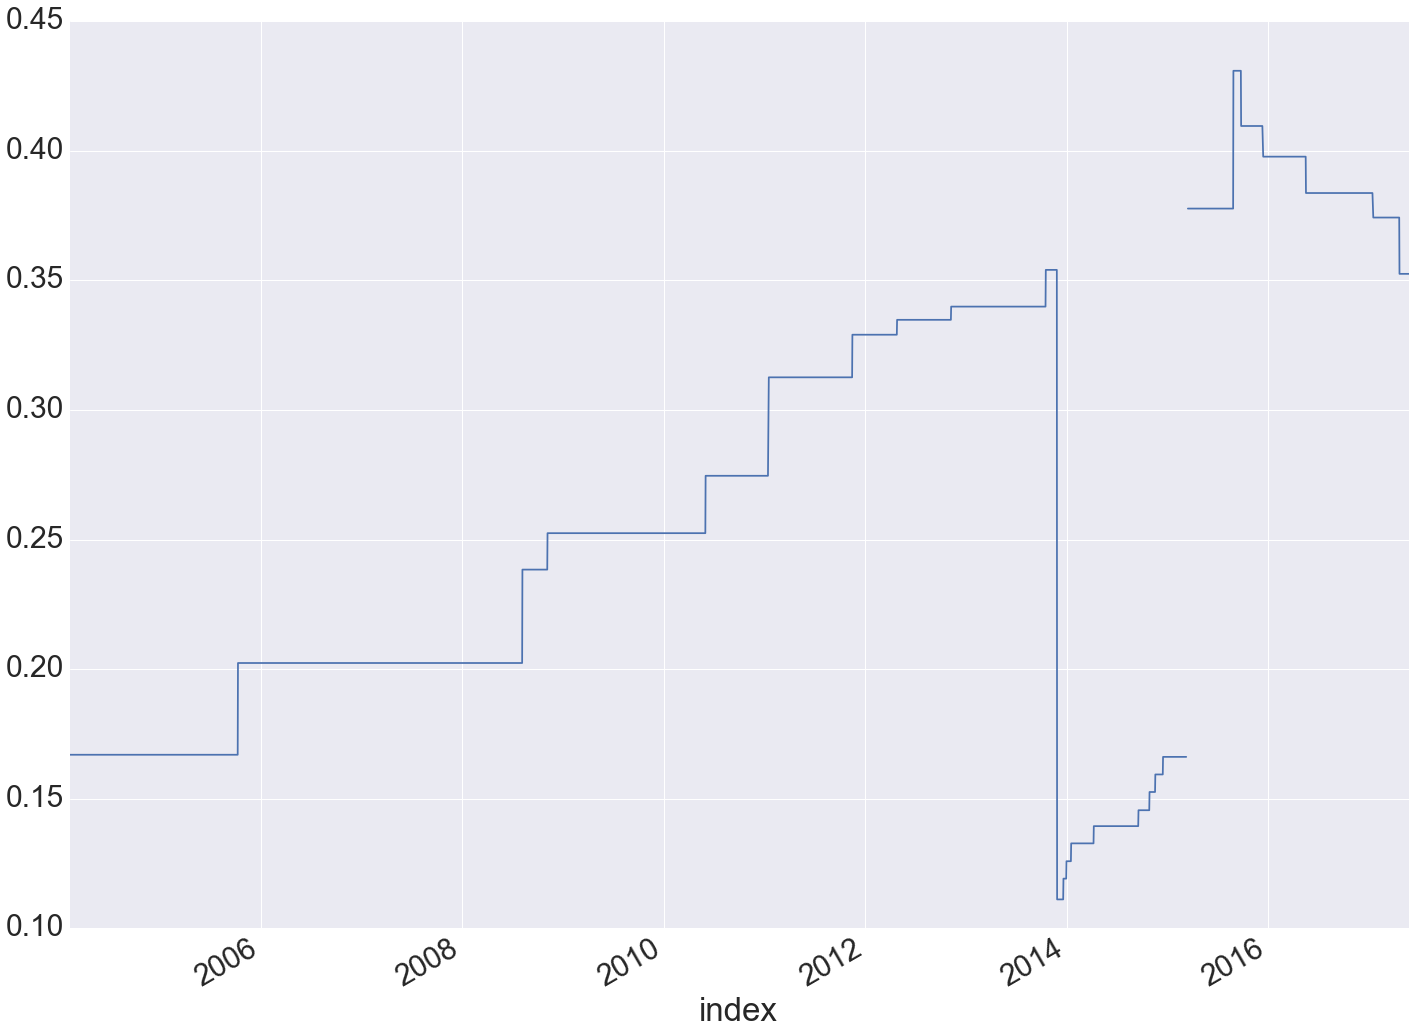

In [31]:
scaling_factor.plot()

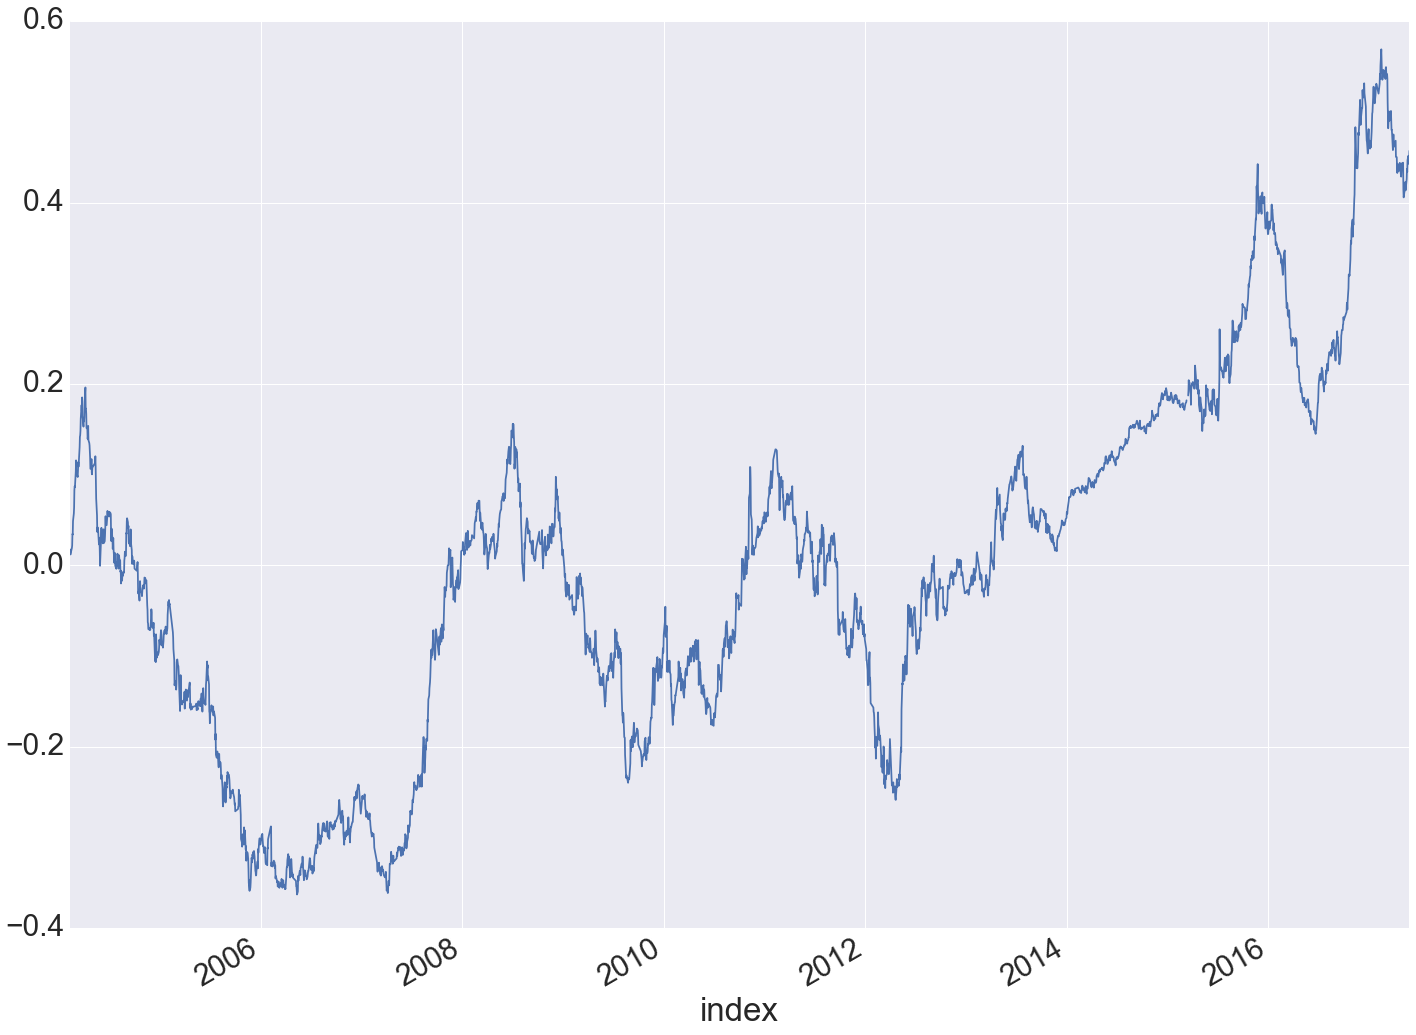

In [34]:
portfolio.cumsum().plot()